In [1]:
pip install gekko


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# generate cubic suplinne and seek maximum and minimum value of cubic supline

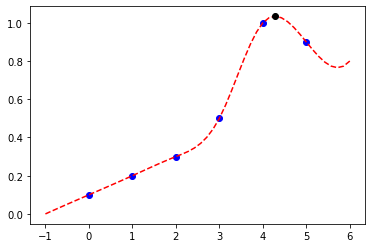

In [11]:
xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,1.0,0.9])

from gekko import GEKKO

m = GEKKO()
m.x = m.Param(value=np.linspace(-1,6))    # you can extend the domain for extrapolation
m.y = m.Var()
m.cspline(m.x,m.y,xm,ym)
m.options.IMODE=2
m.solve(disp=False)

p = GEKKO()
p.x = p.Var(value=1,lb=0,ub=5)       # in order to create the bounds where the data is valid
p.y = p.Var()
p.Obj(-p.y)   # need objective function to know where we need to maximize or minimize
p.cspline(p.x,p.y,xm,ym)
p.solve(disp=False)



plt.plot(xm,ym,'bo',label = 'data')
plt.plot(m.x,m.y,'r--',label='cubic spline')
plt.plot(p.x,p.y,'ko',label='maximum')
